<a href="https://colab.research.google.com/github/LuisRoberto96/Exercicios_Hadoop/blob/main/Exercicios%20Aula%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fundamentos de BigData na prática

In [2]:
                                                                                                                                                                                                                # Interagindo com os dados no colab
import pandas as pd
DATA_PATH="/content/data_labs/"
try:
  df_clientes = pd.read_csv(DATA_PATH + "clientes.csv")
  df_vendas = pd.read_csv(DATA_PATH + "vendas.csv")
  print("Arquivos carregados com sucesso")
except FileNotFoundError:
  print("Arquivo não encontrado")



Arquivo não encontrado


In [3]:
# Interagindo com dados do Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
DATA_PATH="/content/drive/MyDrive/curso_hadoop/"
try:
  df_clientes = pd.read_csv(DATA_PATH + "clientes.csv")
  df_vendas = pd.read_csv(DATA_PATH + "vendas.csv")
  print("Arquivos carregados com sucesso")
except FileNotFoundError:
  print("Arquivo não encontrado")

Arquivos carregados com sucesso


In [5]:
print(" -- Clientes -- ")
print(df_clientes.head())
print(" -- Vendas -- ")
print(df_vendas.head())

 -- Clientes -- 
   cliente_id                       nome                        email  \
0        1044  Sra. Maria Luísa Monteiro  maria-cecilia44@example.com   
1        1004                 Ísis Lopes           enzo04@example.org   
2        1564           Leandro da Costa   alicedas-neves@example.net   
3        1664            Cecilia Azevedo       fernanda33@example.org   
4        1199              Alice Rezende         lbarbosa@example.com   

             cidade estado  
0  Fonseca do Oeste     AL  
1         das Neves     PB  
2    Duarte de Lima     PR  
3         Fernandes     MG  
4     Rios do Oeste     MG  
 -- Vendas -- 
   id_venda  data_venda  id_produto           produto    categoria  \
0         1  2024-01-01         101     Notebook Dell  Eletrônicos   
1         2  2024-01-02         102    Mouse Logitech  Periféricos   
2         3  2024-01-03         103  Teclado Mecânico  Periféricos   
3         4  2024-01-04         104     Monitor LG 27  Eletrônicos   
4    

In [6]:
print(df_clientes.dtypes)
print(df_vendas.dtypes)

cliente_id     int64
nome          object
email         object
cidade        object
estado        object
dtype: object
id_venda            int64
data_venda         object
id_produto          int64
produto            object
categoria          object
quantidade          int64
preco_unitario    float64
valor_total       float64
id_cliente          int64
cliente            object
regiao             object
estado             object
dtype: object


In [7]:
print("-- Informações dos clientes ")
df_clientes.info()
print("-- Informações das vendas ")
df_vendas.info()


-- Informações dos clientes 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cliente_id  500 non-null    int64 
 1   nome        500 non-null    object
 2   email       500 non-null    object
 3   cidade      500 non-null    object
 4   estado      500 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.7+ KB
-- Informações das vendas 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_venda        30 non-null     int64  
 1   data_venda      30 non-null     object 
 2   id_produto      30 non-null     int64  
 3   produto         30 non-null     object 
 4   categoria       30 non-null     object 
 5   quantidade      30 non-null     int64  
 6   preco_unitario  30 non-null     float64
 

In [8]:
print("Clientes")
total_clientes = df_clientes['cliente_id'].nunique()
print(f"Total de clientes:{total_clientes}")
print("Vendas")
valor_medio_venda = df_vendas['valor_total'].mean()
print(f"Valor médio das vendas: {valor_medio_venda: .2f}")

Clientes
Total de clientes:500
Vendas
Valor médio das vendas:  2150.33


1. Configurando as Variáveis de Ambiente

In [9]:
import os
import subprocess

# Encontrar o caminho correto do JAVA_HOME
java_home_result = subprocess.run(['update-alternatives', '--query', 'java'], capture_output=True, text=True)
java_path = java_home_result.stdout.split('Best: ')[1].split('\n')[0]
java_home = os.path.dirname(os.path.dirname(java_path))

print(f"JAVA_HOME detectado: {java_home}")

# Configurar as variáveis de ambiente
os.environ["JAVA_HOME"] = java_home
os.environ["HADOOP_HOME"] = "/content/hadoop-3.2.1"
os.environ["PATH"] = os.environ["PATH"] + ":/content/hadoop-3.2.1/bin:/content/hadoop-3.2.1/sbin"

print(f"\n✅ Variáveis de ambiente configuradas:")
print(f"   JAVA_HOME: {os.environ['JAVA_HOME']}")
print(f"   HADOOP_HOME: {os.environ['HADOOP_HOME']}")

JAVA_HOME detectado: /usr/lib/jvm/java-17-openjdk-amd64

✅ Variáveis de ambiente configuradas:
   JAVA_HOME: /usr/lib/jvm/java-17-openjdk-amd64
   HADOOP_HOME: /content/hadoop-3.2.1


2. Instalando o Hadoop

In [10]:
# Passo 1: Baixar o Hadoop
!wget -q https://archive.apache.org/dist/hadoop/common/hadoop-3.2.1/hadoop-3.2.1.tar.gz

# Passo 2: Extrair o arquivo
!tar -xzf hadoop-3.2.1.tar.gz -C /content/

# Passo 3: Criar links simbólicos para os binários
!ln -sf /content/hadoop-3.2.1/bin/* /usr/bin/ 2>/dev/null
!ln -sf /content/hadoop-3.2.1/sbin/* /usr/bin/ 2>/dev/null

print("✅ Hadoop instalado com sucesso!")

✅ Hadoop instalado com sucesso!


3. Configurando o Hadoop


In [11]:
# Configurar core-site.xml
core_site_xml = """<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="configuration.xsl"?>
<configuration>
    <property>
        <name>fs.defaultFS</name>
        <value>hdfs://localhost:9000</value>
    </property>
</configuration>"""

with open("/content/hadoop-3.2.1/etc/hadoop/core-site.xml", "w") as f:
    f.write(core_site_xml)

print("✅ core-site.xml configurado")

✅ core-site.xml configurado


In [12]:
# Configurar hdfs-site.xml
hdfs_site_xml = """<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="configuration.xsl"?>
<configuration>
    <property>
        <name>dfs.replication</name>
        <value>1</value>
    </property>
    <property>
        <name>dfs.namenode.name.dir</name>
        <value>/content/hadoop_data/namenode</value>
    </property>
    <property>
        <name>dfs.datanode.data.dir</name>
        <value>/content/hadoop_data/datanode</value>
    </property>
</configuration>"""

with open("/content/hadoop-3.2.1/etc/hadoop/hdfs-site.xml", "w") as f:
    f.write(hdfs_site_xml)

print("✅ hdfs-site.xml configurado")

✅ hdfs-site.xml configurado


In [13]:
# Configurar hadoop-env.sh para incluir JAVA_HOME
hadoop_env_path = "/content/hadoop-3.2.1/etc/hadoop/hadoop-env.sh"

with open(hadoop_env_path, "r") as f:
    content = f.read()

# Substituir a linha de JAVA_HOME se existir, ou adicionar no final
if "export JAVA_HOME" in content:
    content = content.replace(
        "export JAVA_HOME=${JAVA_HOME}",
        f"export JAVA_HOME={os.environ['JAVA_HOME']}"
    )
else:
    content += f"\nexport JAVA_HOME={os.environ['JAVA_HOME']}\n"

with open(hadoop_env_path, "w") as f:
    f.write(content)

print("✅ hadoop-env.sh configurado com JAVA_HOME")

✅ hadoop-env.sh configurado com JAVA_HOME


4. Criando os diretórios de trabalho no Hadoop

In [14]:
# Criar os diretórios de dados do Hadoop
!mkdir -p /content/hadoop_data/namenode
!mkdir -p /content/hadoop_data/datanode

print("✅ Diretórios de dados criados")

✅ Diretórios de dados criados


5. Formatando e iniciando o HDFS

In [15]:
# Definir JAVA_HOME para o comando
import os
env = os.environ.copy()
env["JAVA_HOME"] = os.environ["JAVA_HOME"]
env["HADOOP_HOME"] = os.environ["HADOOP_HOME"]

# Formatar o NameNode
!export JAVA_HOME={os.environ['JAVA_HOME']} && /content/hadoop-3.2.1/bin/hdfs namenode -format -force

print("✅ NameNode formatado com sucesso!")

2026-02-17 19:22:24,638 INFO namenode.NameNode: STARTUP_MSG: 
/************************************************************
STARTUP_MSG: Starting NameNode
STARTUP_MSG:   host = 24c3a84b3e3b/172.28.0.12
STARTUP_MSG:   args = [-format, -force]
STARTUP_MSG:   version = 3.2.1
STARTUP_MSG:   classpath = /content/hadoop-3.2.1/etc/hadoop:/content/hadoop-3.2.1/share/hadoop/common/lib/slf4j-api-1.7.25.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/jsp-api-2.1.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/kerby-util-1.0.1.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/woodstox-core-5.0.3.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/zookeeper-3.4.13.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/jersey-core-1.19.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/jetty-webapp-9.3.24.v20180605.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/jul-to-slf4j-1.7.25.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/jaxb-api-2.2.11.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/jaxb-

6. Trabalhando com o HDFS

In [16]:
%%bash
set -e

JAVA_BIN="$(readlink -f "$(which java)")"
export JAVA_HOME="$(dirname "$(dirname "$JAVA_BIN")")"

export HADOOP_HOME="/content/hadoop-3.2.1"
export PATH="$PATH:$HADOOP_HOME/bin:$HADOOP_HOME/sbin"

echo "JAVA_HOME=$JAVA_HOME"

$HADOOP_HOME/bin/hdfs --daemon start namenode
$HADOOP_HOME/bin/hdfs --daemon start datanode
$HADOOP_HOME/bin/hdfs --daemon start secondarynamenode

jps

echo ""
echo "✅ HDFS iniciado!"


JAVA_HOME=/usr/lib/jvm/java-17-openjdk-amd64
1251 Jps
1204 SecondaryNameNode
1143 DataNode
1086 NameNode

✅ HDFS iniciado!


In [17]:
!jps

1204 SecondaryNameNode
1143 DataNode
1086 NameNode
1279 Jps


In [18]:
# 1. Criar um diretório para nossos datasets
!export JAVA_HOME={os.environ['JAVA_HOME']} && hdfs dfs -mkdir -p /user/ecommerce/datasets

print("✅ Diretório criado no HDFS")

✅ Diretório criado no HDFS


In [19]:
# 2. Listar o conteúdo do diretório raiz do HDFS
!export JAVA_HOME={os.environ['JAVA_HOME']} && hdfs dfs -ls /user/ecommerce/datasets

In [20]:
DATA_PATH="/content/drive/MyDrive/curso_hadoop/"
!export JAVA_HOME={os.environ['JAVA_HOME']} && hdfs dfs -put $DATA_PATH/clientes.csv /user/ecommerce/datasets/clientes.csv
!export JAVA_HOME={os.environ['JAVA_HOME']} && hdfs dfs -put $DATA_PATH/vendas.csv /user/ecommerce/datasets/vendas.csv
!export JAVA_HOME={os.environ['JAVA_HOME']} && hdfs dfs -put $DATA_PATH/produtos.csv /user/ecommerce/datasets/produtos.csv

print("✅ Arquivos copiados para o HDFS")

2026-02-17 19:22:50,559 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
2026-02-17 19:22:54,039 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
2026-02-17 19:22:58,580 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
✅ Arquivos copiados para o HDFS


In [21]:
# Visualizar as linhas de um arquivo
!export JAVA_HOME={os.environ['JAVA_HOME']} && hdfs dfs -cat /user/ecommerce/datasets/clientes.csv | head -n 5

2026-02-17 19:23:01,906 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
cliente_id,nome,email,cidade,estado
1044,Sra. Maria Luísa Monteiro,maria-cecilia44@example.com,Fonseca do Oeste,AL
1004,Ísis Lopes,enzo04@example.org,das Neves,PB
1564,Leandro da Costa,alicedas-neves@example.net,Duarte de Lima,PR
1664,Cecilia Azevedo,fernanda33@example.org,Fernandes,MG


7. Haddop MapReduce

In [22]:
# Criar um arquivo de texto de exemplo
!echo "hello world big data hello hadoop spark big data" > exemplo.txt

# Enviar para o HDFS
!export JAVA_HOME={os.environ['JAVA_HOME']} && hdfs dfs -put exemplo.txt /user/ecommerce/
# Map: Transforma cada palavra em (palavra, 1)
# Reduce: Soma as contagens para cada palavra
!export JAVA_HOME={os.environ['JAVA_HOME']} && hdfs dfs -cat /user/ecommerce/exemplo.txt | tr ' ' '\n' | sort | uniq -c

print("\n✅ Simulação de MapReduce concluída!")

2026-02-17 19:23:04,904 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
2026-02-17 19:23:07,760 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
      2 big
      2 data
      1 hadoop
      2 hello
      1 spark
      1 world

✅ Simulação de MapReduce concluída!


In [23]:
%%bash
set -e

cat > /content/mapper_vendas_por_dia.py << 'PY'
#!/usr/bin/env python3
import sys, csv
reader = csv.DictReader(sys.stdin)
for row in reader:
    # data_venda: "YYYY-MM-DD HH:MM:SS" -> pega só a data
    dia = row["data_venda"].split(" ")[0].strip()
    total = float(row["valor_total"]) # Corrigido de 'preco_total' para 'valor_total'
    print(f"{dia}\t{total}")
PY

cat > /content/reducer_soma.py << 'PY'
#!/usr/bin/env python3
import sys
current = None
acc = 0.0
for line in sys.stdin:
    key, val = line.rstrip("\n").split("\t", 1)
    val = float(val)
    if current is None:
        current = key
    if key != current:
        print(f"{current}\t{acc:.2f}")
        current = key
        acc = 0.0
    acc += val
if current is not None:
    print(f"{current}\t{acc:.2f}")
PY

chmod +x /content/mapper_vendas_por_dia.py /content/reducer_soma.py

In [24]:
%%bash
set -e
export HADOOP_HOME="/content/hadoop-3.2.1"
export PATH="$PATH:$HADOOP_HOME/bin:$HADOOP_HOME/sbin"
export STREAMING_JAR="$(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar | head -n 1)"

OUT="/user/ecommerce/output/vendas_por_dia"
hdfs dfs -rm -r -f "$OUT" >/dev/null 2>&1 || true

# roda o job e joga logs fora
hadoop jar "$STREAMING_JAR" \
  -D mapreduce.job.name="vendas_por_dia" \
  -input  /user/ecommerce/datasets/vendas.csv \
  -output "$OUT" \
  -mapper  /content/mapper_vendas_por_dia.py \
  -reducer /content/reducer_soma.py \
  -file /content/mapper_vendas_por_dia.py \
  -file /content/reducer_soma.py \
  2>/dev/null

echo "---- primeiras 10 linhas ----"
hdfs dfs -text "$OUT/part-00000" 2>/dev/null | sed -n '1,10p'

packageJobJar: [/content/mapper_vendas_por_dia.py, /content/reducer_soma.py] [] /tmp/streamjob6945211789237091487.jar tmpDir=null
---- primeiras 10 linhas ----
2024-01-01	7000.00
2024-01-02	750.00
2024-01-03	1350.00
2024-01-04	1200.00
2024-01-05	1120.00
2024-01-06	3500.00
2024-01-07	1500.00
2024-01-08	900.00
2024-01-09	2400.00
2024-01-10	840.00


In [31]:
%%bash
set -e

cat > /content/mapper_faturamento_estado.py << 'PY'
#!/usr/bin/env python3
import sys, csv, glob, os

def achar_arquivo_clientes():
    # tentativa 1: nome padrão
    if os.path.exists("clientes.csv"):
        return "clientes.csv"

    # tentativa 2: qualquer csv no diretório de trabalho com header de clientes
    for f in glob.glob("*.csv"):
        try:
            with open(f, "r", encoding="utf-8", newline="") as fp:
                header = fp.readline().strip().lower()
                if "cliente_id" in header and "estado" in header and "email" in header:
                    return f
        except Exception:
            pass

    raise FileNotFoundError("Não achei clientes.csv (nem outro CSV com colunas cliente_id/estado/email) no diretório do mapper.")

clientes_file = achar_arquivo_clientes()

estado_por_cliente = {}
with open(clientes_file, newline="", encoding="utf-8") as f:
    r = csv.DictReader(f)
    for row in r:
        estado_por_cliente[str(row["cliente_id"])] = row["estado"].strip()

reader = csv.DictReader(sys.stdin)
for row in reader:
    cid = str(row["id_cliente"]) # Alterado de 'cliente_id' para 'id_cliente'
    estado = estado_por_cliente.get(cid, "??")
    total = float(row["valor_total"]) # Alterado de 'preco_total' para 'valor_total'
    print(f"{estado}\t{total}")
PY

chmod +x /content/mapper_faturamento_estado.py

In [26]:
%%bash
set -e
export HADOOP_HOME="/content/hadoop-3.2.1"
export PATH="$PATH:$HADOOP_HOME/bin:$HADOOP_HOME/sbin"

# baixa do HDFS para o filesystem local do Colab
hdfs dfs -get -f /user/ecommerce/datasets/clientes.csv /content/clientes.csv

# confirma que existe
ls -lh /content/clientes.csv
head -n 2 /content/clientes.csv

-rw-r--r-- 1 root root 31K Feb 17 19:23 /content/clientes.csv
cliente_id,nome,email,cidade,estado
1044,Sra. Maria Luísa Monteiro,maria-cecilia44@example.com,Fonseca do Oeste,AL


2026-02-17 19:23:22,587 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false


In [27]:
%%bash
set +e
export HADOOP_HOME="/content/hadoop-3.2.1"
export PATH="$PATH:$HADOOP_HOME/bin:$HADOOP_HOME/sbin"
export STREAMING_JAR="$(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar | head -n 1)"

OUT="/user/ecommerce/output/faturamento_por_estado"
hdfs dfs -rm -r -f "$OUT" >/dev/null 2>&1 || true

hadoop jar "$STREAMING_JAR" \
  -D mapreduce.job.name="faturamento_por_estado" \
  -input  /user/ecommerce/datasets/vendas.csv \
  -output "$OUT" \
  -mapper  /content/mapper_faturamento_estado.py \
  -reducer /content/reducer_soma.py \
  -file /content/mapper_faturamento_estado.py \
  -file /content/reducer_soma.py \
  -file /content/clientes.csv \
  2>&1 | tail -n 60

EC=${PIPESTATUS[0]}
echo ""
echo "EXIT_CODE=$EC"

if [ "$EC" -eq 0 ]; then
  echo ""
  echo -e "TOTAL\tESTADO (Top 10)"
  hdfs dfs -text "$OUT/part-00000" | awk -F'\t' '{print $2"\t"$1}' | sort -nr | head -n 10
else
  echo ""
  echo "Job falhou. Vamos listar logs do HDFS output:"
  hdfs dfs -ls "$OUT" 2>/dev/null || true
fi

2026-02-17 19:23:31,351 INFO Configuration.deprecation: map.input.start is deprecated. Instead, use mapreduce.map.input.start
2026-02-17 19:23:31,352 INFO Configuration.deprecation: mapred.task.is.map is deprecated. Instead, use mapreduce.task.ismap
2026-02-17 19:23:31,353 INFO Configuration.deprecation: mapred.task.id is deprecated. Instead, use mapreduce.task.attempt.id
2026-02-17 19:23:31,354 INFO Configuration.deprecation: mapred.tip.id is deprecated. Instead, use mapreduce.task.id
2026-02-17 19:23:31,354 INFO Configuration.deprecation: mapred.local.dir is deprecated. Instead, use mapreduce.cluster.local.dir
2026-02-17 19:23:31,355 INFO Configuration.deprecation: map.input.file is deprecated. Instead, use mapreduce.map.input.file
2026-02-17 19:23:31,355 INFO Configuration.deprecation: mapred.skip.on is deprecated. Instead, use mapreduce.job.skiprecords
2026-02-17 19:23:31,355 INFO Configuration.deprecation: map.input.length is deprecated. Instead, use mapreduce.map.input.length
202

In [28]:
%%bash
set -e
export HADOOP_HOME="/content/hadoop-3.2.1"
export PATH="$PATH:$HADOOP_HOME/bin:$HADOOP_HOME/sbin"
export STREAMING_JAR="$(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar | head -n 1)"
echo "OK: $STREAMING_JAR"
hdfs dfs -ls /user/ecommerce/datasets | head


OK: /content/hadoop-3.2.1/share/hadoop/tools/lib/hadoop-streaming-3.2.1.jar
Found 3 items
-rw-r--r--   1 root supergroup      30842 2026-02-17 19:22 /user/ecommerce/datasets/clientes.csv
-rw-r--r--   1 root supergroup       8217 2026-02-17 19:22 /user/ecommerce/datasets/produtos.csv
-rw-r--r--   1 root supergroup       2898 2026-02-17 19:22 /user/ecommerce/datasets/vendas.csv


In [36]:
%%bash
set -e

cat > /content/mapper_faturamento_produto.py << 'PY'
#!/usr/bin/env python3
import sys, csv, os

# acha produtos.csv no diretório do task
prod_file = "produtos.csv"
if not os.path.exists(prod_file):
    # fallback: tenta achar qualquer arquivo que tenha header com produto_id
    import glob
    for f in glob.glob("*.csv"):
        with open(f, "r", encoding="utf-8", newline="") as fp:
            h = fp.readline().lower()
            if "produto_id" in h and ("categoria" in h or "nome" in h):
                prod_file = f
                break

prod = {}
with open(prod_file, newline="", encoding="utf-8") as f:
    r = csv.DictReader(f)
    for row in r:
        prod[str(row["produto_id"])] = row.get("nome") or row.get("produto") or row.get("descricao") or str(row["produto_id"])

reader = csv.DictReader(sys.stdin)
for row in reader:
    pid = str(row["id_produto"]) # Alterado de 'produto_id' para 'id_produto'
    nome = prod.get(pid, f"produto_{pid}")
    total = float(row["valor_total"])
    print(f"{nome}\t{total}")
PY

cat > /content/reducer_soma.py << 'PY'
#!/usr/bin/env python3
import sys

cur = None
acc = 0.0

for line in sys.stdin:
    key, val = line.rstrip("\n").split("\t", 1)
    v = float(val)
    if cur is None:
        cur = key
    if key != cur:
        print(f"{cur}\t{acc:.2f}")
        cur = key
        acc = 0.0
    acc += v

if cur is not None:
    print(f"{cur}\t{acc:.2f}")
PY

chmod +x /content/mapper_faturamento_produto.py /content/reducer_soma.py

In [37]:
%%bash
set -e
export HADOOP_HOME="/content/hadoop-3.2.1"
export PATH="$PATH:$HADOOP_HOME/bin:$HADOOP_HOME/sbin"
export STREAMING_JAR="$(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar | head -n 1)"

OUT="/user/ecommerce/output/faturamento_por_produto"
hdfs dfs -rm -r -f "$OUT" >/dev/null 2>&1 || true

# Baixa o produtos.csv do HDFS para o filesystem local do Colab
hdfs dfs -get -f /user/ecommerce/datasets/produtos.csv /content/produtos.csv

hadoop jar "$STREAMING_JAR" \
  -D mapreduce.job.name="faturamento_por_produto" \
  -input  /user/ecommerce/datasets/vendas.csv \
  -output "$OUT" \
  -mapper  /content/mapper_faturamento_produto.py \
  -reducer /content/reducer_soma.py \
  -file /content/mapper_faturamento_produto.py \
  -file /content/reducer_soma.py \
  -file /content/produtos.csv

echo -e "TOTAL\tPRODUTO (Top 10)"
hdfs dfs -text "$OUT/part-00000" \
| awk -F'\t' '{print $2"\t"$1}' \
| sort -nr \
| head -n 10

packageJobJar: [/content/mapper_faturamento_produto.py, /content/reducer_soma.py, /content/produtos.csv] [] /tmp/streamjob5501058410744679652.jar tmpDir=null
TOTAL	PRODUTO (Top 10)
35000.00	101
12000.00	104
6750.00	103
6000.00	102
4760.00	105


2026-02-17 19:29:15,362 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
2026-02-17 19:29:17,651 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
2026-02-17 19:29:19,183 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2026-02-17 19:29:19,467 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2026-02-17 19:29:19,468 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2026-02-17 19:29:19,502 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2026-02-17 19:29:19,847 INFO mapred.FileInputFormat: Total input files to process : 1
2026-02-17 19:29:19,917 INFO mapreduce.JobSubmitter: number of splits:1
2026-02-17 19:29:20,330 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local539605479_0001
2026-02-17 19:29:20,330 INFO mapreduce.JobSubmitter: Executing with tokens: []
2026-02-17 

In [38]:
%%bash
set +e
export HADOOP_HOME="/content/hadoop-3.2.1"
export PATH="$PATH:$HADOOP_HOME/bin:$HADOOP_HOME/sbin"
export STREAMING_JAR="$(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar | head -n 1)"

OUT="/user/ecommerce/output/faturamento_por_estado"
hdfs dfs -rm -r -f "$OUT" >/dev/null 2>&1 || true

hadoop jar "$STREAMING_JAR" \
  -D mapreduce.job.name="faturamento_por_estado" \
  -input  /user/ecommerce/datasets/vendas.csv \
  -output "$OUT" \
  -mapper  /content/mapper_faturamento_estado.py \
  -reducer /content/reducer_soma.py \
  -file /content/mapper_faturamento_estado.py \
  -file /content/reducer_soma.py \
  -file /content/clientes.csv \
  2>&1 | tail -n 60

EC=${PIPESTATUS[0]}
echo ""
echo "EXIT_CODE=$EC"

if [ "$EC" -eq 0 ]; then
  echo ""
  echo -e "TOTAL\tESTADO (Top 10)"
  hdfs dfs -text "$OUT/part-00000" | awk -F'\t' '{print $2"\t"$1}' | sort -nr | head -n 10
else
  echo ""
  echo "Job falhou. Vamos listar logs do HDFS output:"
  hdfs dfs -ls "$OUT" 2>/dev/null || true
fi

		Failed Shuffles=0
		Merged Map outputs=1
		GC time elapsed (ms)=0
		Total committed heap usage (bytes)=184549376
	Shuffle Errors
		BAD_ID=0
		CONNECTION=0
		IO_ERROR=0
		WRONG_LENGTH=0
		WRONG_MAP=0
		WRONG_REDUCE=0
	File Output Format Counters 
		Bytes Written=120
2026-02-17 19:29:42,363 INFO mapred.LocalJobRunner: Finishing task: attempt_local1806669002_0001_r_000000_0
2026-02-17 19:29:42,364 INFO mapred.LocalJobRunner: reduce task executor complete.
2026-02-17 19:29:42,916 INFO mapreduce.Job:  map 100% reduce 100%
2026-02-17 19:29:42,917 INFO mapreduce.Job: Job job_local1806669002_0001 completed successfully
2026-02-17 19:29:42,928 INFO mapreduce.Job: Counters: 36
	File System Counters
		FILE: Number of bytes read=88966
		FILE: Number of bytes written=1145889
		FILE: Number of read operations=0
		FILE: Number of large read operations=0
		FILE: Number of write operations=0
		HDFS: Number of bytes read=5796
		HDFS: Number of bytes written=120
		HDFS: Number of read operations=15
		H

2026-02-17 19:29:45,778 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false


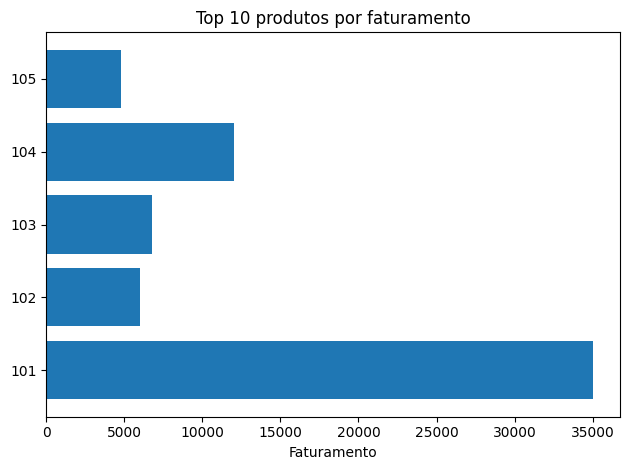

In [39]:
import pandas as pd
import subprocess, io
from matplotlib import pyplot as plt

OUT = "/user/ecommerce/output/faturamento_por_produto/part-00000"
txt = subprocess.check_output(["hdfs","dfs","-text",OUT], text=True)

df = pd.read_csv(io.StringIO(txt), sep="\t", header=None, names=["produto","faturamento"])
df["faturamento"] = pd.to_numeric(df["faturamento"], errors="coerce")
top = df.sort_values("faturamento", ascending=False).head(10)

plt.figure()
plt.barh(top["produto"][::-1], top["faturamento"][::-1])
plt.title("Top 10 produtos por faturamento")
plt.xlabel("Faturamento")
plt.tight_layout()
plt.show()

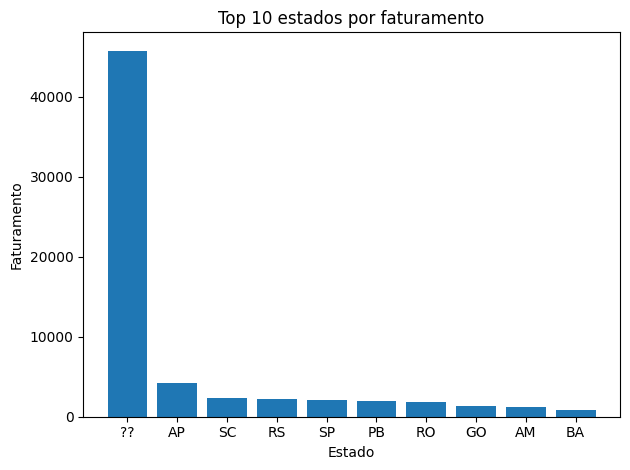

In [40]:
import pandas as pd
import subprocess, io
from matplotlib import pyplot as plt

OUT = "/user/ecommerce/output/faturamento_por_estado/part-00000"
txt = subprocess.check_output(["hdfs","dfs","-text",OUT], text=True)

df = pd.read_csv(io.StringIO(txt), sep="\t", header=None, names=["estado","faturamento"])
df["faturamento"] = pd.to_numeric(df["faturamento"], errors="coerce")
top = df.sort_values("faturamento", ascending=False).head(10)

plt.figure()
plt.bar(top["estado"], top["faturamento"])
plt.title("Top 10 estados por faturamento")
plt.xlabel("Estado")
plt.ylabel("Faturamento")
plt.tight_layout()
plt.show()


# Exercício - Laboratório prático
### Faturamento por categoria do produto
1. Criar um map de produto segmentando categoria e preço
2. faça um reducer de soma por categoria
3. Exiba o top 5 (head -n 5) de categoras
4. Gere um gráfico (pode ser o de barras ou um de sua escolha) com as 5 categorias mais caras

(Lembrando, é apenas um exemplo, visto que não somariamos preço de categorias, olhariamos talvez média por categoria ou cruzariamos vendas por categoria, mas é mais um exercicio para vocês testarem o conhecimento)

Onde ver mais gráficos e informações:

[MatPLotLib](https://matplotlib.org/)

[Pandas](https://pandas.pydata.org/docs/user_guide/visualization.html)

[Seaborn](https://seaborn.pydata.org/)

Exercicio 2, fazer o mesmo com um dataset de sua preferencia, alguns exemplos:
- https://data.gov/
- https://data.worldbank.org/
- https://opendata.cityofnewyork.us/


# **Faturamento por categoria do produto**
* Criar um map de produto segmentando categoria e preço
* faça um reducer de soma por categoria
* Exiba o top 5 (head -n 5) de categoras
* Gere um gráfico (pode ser o de barras ou um de sua escolha) com as 5 categorias mais caras




In [49]:
#1) Criar Mapper (categoria + valor_total da venda)

%%bash
set -e

cat > /content/mapper_faturamento_categoria.py << 'PY'
#!/usr/bin/env python3
import sys, csv, os

# Carrega produtos.csv para mapear produto_id -> categoria
produtos = {}

with open("produtos.csv", "r", encoding="utf-8") as f:
    reader = csv.DictReader(f)
    for row in reader:
        produtos[row["id_produto"]] = row["categoria"]

# Lê vendas.csv via STDIN
reader = csv.DictReader(sys.stdin)
for row in reader:
    produto_id = row["id_produto"]
    valor = float(row["valor_total"])

    if produto_id in produtos:
        categoria = produtos[produto_id]
        print(f"{categoria}\t{valor}")
PY

chmod +x /content/mapper_faturamento_categoria.py


In [50]:
#2) Criar Reducer (soma por categoria)

%%bash
set -e

cat > /content/reducer_soma_categoria.py << 'PY'
#!/usr/bin/env python3
import sys

current = None
acc = 0.0

for line in sys.stdin:
    key, value = line.strip().split("\t")
    value = float(value)

    if current == key:
        acc += value
    else:
        if current:
            print(f"{current}\t{acc}")
        current = key
        acc = value

if current:
    print(f"{current}\t{acc}")
PY

chmod +x /content/reducer_soma_categoria.py


In [52]:
#3) Executar Job no Hadoop

%%bash
set -e
export HADOOP_HOME="/content/hadoop-3.2.1"
export PATH="$PATH:$HADOOP_HOME/bin:$HADOOP_HOME/sbin"
export STREAMING_JAR=$(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar | head -n 1)

OUT="/user/ecommerce/output/faturamento_por_categoria"
hdfs dfs -rm -r -f "$OUT" >/dev/null 2>&1 || true

# Baixa produtos.csv localmente
hdfs dfs -get -f /user/ecommerce/datasets/produtos.csv /content/produtos.csv

hadoop jar "$STREAMING_JAR" \
  -D mapreduce.job.name="faturamento_por_categoria" \
  -input  /user/ecommerce/datasets/vendas.csv \
  -output "$OUT" \
  -mapper  /content/mapper_faturamento_categoria.py \
  -reducer /content/reducer_soma_categoria.py \
  -file /content/mapper_faturamento_categoria.py \
  -file /content/reducer_soma_categoria.py \
  -file /content/produtos.csv


packageJobJar: [/content/mapper_faturamento_categoria.py, /content/reducer_soma_categoria.py, /content/produtos.csv] [] /tmp/streamjob13350557418237523964.jar tmpDir=null


2026-02-17 19:46:20,428 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
2026-02-17 19:46:21,810 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
2026-02-17 19:46:23,283 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2026-02-17 19:46:23,517 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2026-02-17 19:46:23,517 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2026-02-17 19:46:23,540 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2026-02-17 19:46:23,774 INFO mapred.FileInputFormat: Total input files to process : 1
2026-02-17 19:46:23,831 INFO mapreduce.JobSubmitter: number of splits:1
2026-02-17 19:46:24,226 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1056581148_0001
2026-02-17 19:46:24,226 INFO mapreduce.JobSubmitter: Executing with tokens: []
2026-02-17

In [53]:
#4) Exibir Top 5 Categorias

!hdfs dfs -cat /user/ecommerce/output/faturamento_por_categoria/part-00000 | sort -k2 -nr | head -n 5


2026-02-17 19:46:52,194 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
Eletrônicos	51760.0
Brinquedos	6750.0
Casa e Cozinha	6000.0


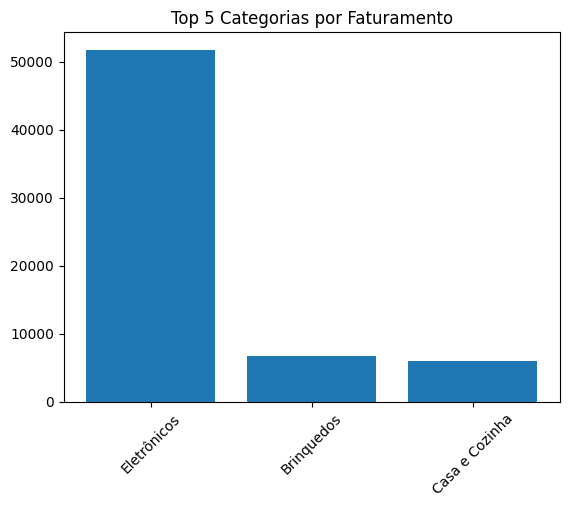

In [54]:
#5) Gerar Gráfico das 5 Categorias Mais Rentáveis

import pandas as pd
import subprocess, io
import matplotlib.pyplot as plt

OUT = "/user/ecommerce/output/faturamento_por_categoria/part-00000"
txt = subprocess.check_output(["hdfs","dfs","-text",OUT], text=True)

df = pd.read_csv(io.StringIO(txt), sep="\t", header=None, names=["categoria","faturamento"])
df["faturamento"] = pd.to_numeric(df["faturamento"], errors="coerce")

top5 = df.sort_values("faturamento", ascending=False).head(5)

plt.figure()
plt.bar(top5["categoria"], top5["faturamento"])
plt.title("Top 5 Categorias por Faturamento")
plt.xticks(rotation=45)
plt.show()


# **Exercicio 2, fazer o mesmo com um dataset de sua preferencia**

In [62]:
#Baixando o dataset no Colab

# baixar dataset de GDP por país (World Bank 2022)
!wget -O gdp_worldbank_2022.csv \
  https://gist.githubusercontent.com/KlauArizmendi/ed6686a113c6b4e2c176d6efa6d85849/raw/gdp-2022-by-country-worldbank.csv


--2026-02-17 19:57:40--  https://gist.githubusercontent.com/KlauArizmendi/ed6686a113c6b4e2c176d6efa6d85849/raw/gdp-2022-by-country-worldbank.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9806 (9.6K) [text/plain]
Saving to: ‘gdp_worldbank_2022.csv’

gdp_worldbank_2022. 100%[===================>]   9.58K  --.-KB/s    in 0s      

2026-02-17 19:57:40 (59.3 MB/s) - ‘gdp_worldbank_2022.csv’ saved [9806/9806]



In [63]:
#Preparar o CSV para HDFS

%%bash
set -e

# criar pasta no HDFS
hdfs dfs -mkdir -p /user/datasets

# enviar o CSV para HDFS
hdfs dfs -put -f gdp_worldbank_2022.csv /user/datasets/gdp_worldbank_2022.csv


2026-02-17 19:57:48,703 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false


In [64]:
#Mapper para PIB por País

%%bash
set -e

cat > mapper_gdp_worldbank.py << 'PY'
#!/usr/bin/env python3
import sys, csv

# lê CSV de stdin e imprime país\tvalorPIB
reader = csv.DictReader(sys.stdin)
for row in reader:
    country = row.get("Country Name", "").strip()
    value = row.get("2022", "").strip()

    # pular linhas sem dados
    if country and value:
        try:
            val = float(value)
            print(f"{country}\t{val}")
        except:
            pass
PY

chmod +x mapper_gdp_worldbank.py


In [65]:
#Reducer para somar PIB por País

%%bash
set -e

cat > reducer_gdp_worldbank.py << 'PY'
#!/usr/bin/env python3
import sys

current = None
acc = 0.0

for line in sys.stdin:
    key, value = line.strip().split("\t")
    value = float(value)

    if key == current:
        acc += value
    else:
        if current:
            print(f"{current}\t{acc}")
        current = key
        acc = value

# último
if current:
    print(f"{current}\t{acc}")
PY

chmod +x reducer_gdp_worldbank.py


In [66]:
#Executar o Job MapReduce no Hadoop

%%bash
set -e

# configurações Hadoop
export HADOOP_HOME="/content/hadoop-3.2.1"
export PATH="$PATH:$HADOOP_HOME/bin:$HADOOP_HOME/sbin"
export STREAMING_JAR=$(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar | head -n 1)

OUT="/user/datasets/output/gdp_por_pais"

# remove pasta de saída antiga
hdfs dfs -rm -r -f "$OUT" >/dev/null 2>&1 || true

# rodar job
hadoop jar "$STREAMING_JAR" \
  -D mapreduce.job.name="gdp_por_pais" \
  -input  /user/datasets/gdp_worldbank_2022.csv \
  -output "$OUT" \
  -mapper  /content/mapper_gdp_worldbank.py \
  -reducer /content/reducer_gdp_worldbank.py \
  -file /content/mapper_gdp_worldbank.py \
  -file /content/reducer_gdp_worldbank.py


packageJobJar: [/content/mapper_gdp_worldbank.py, /content/reducer_gdp_worldbank.py] [] /tmp/streamjob13391469449662441111.jar tmpDir=null


2026-02-17 19:57:58,968 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
2026-02-17 19:58:00,307 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2026-02-17 19:58:00,597 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2026-02-17 19:58:00,598 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2026-02-17 19:58:00,636 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2026-02-17 19:58:01,212 INFO mapred.FileInputFormat: Total input files to process : 1
2026-02-17 19:58:01,335 INFO mapreduce.JobSubmitter: number of splits:1
2026-02-17 19:58:01,959 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local2120382706_0001
2026-02-17 19:58:01,959 INFO mapreduce.JobSubmitter: Executing with tokens: []
2026-02-17 19:58:02,466 INFO mapred.LocalDistributedCacheManager: Localized file:/content/mapper_gdp_worldbank.py as file:/tmp/hadoop-root/mapred/loc

In [67]:
#Ver os 10 maiores países por PIB

!hdfs dfs -cat /user/datasets/output/gdp_por_pais/part-00000 | sort -k2 -nr | head -n 10


2026-02-17 19:58:13,622 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
China	17963170521079.8
Japan	4231141201863.17
Germany	4072191736089.51
India	3385089881935.39
France	2782905325624.52
Italy	2010431598465.38
Brazil	1920095560995.06
Australia	1675418665067.09
Korea	1665245538594.96
Mexico	1414187193992.25


In [68]:
#visualizar no Python

import pandas as pd
import subprocess, io

txt = subprocess.check_output(
    ["hdfs", "dfs", "-text", "/user/datasets/output/gdp_por_pais/part-00000"],
    text=True
)

df = pd.read_csv(io.StringIO(txt), sep="\t", names=["pais","pib"])
df_sorted = df.sort_values("pib", ascending=False)

print(df_sorted.head(10))


                   pais           pib
178       United States  2.546270e+13
34                China  1.796317e+13
81                Japan  4.231141e+12
60              Germany  4.072192e+12
73                India  3.385090e+12
177      United Kingdom  3.070668e+12
56               France  2.782905e+12
138  Russian Federation  2.240422e+12
79                Italy  2.010432e+12
22               Brazil  1.920096e+12
